In [1]:
from neodatabases import *

In [6]:
with connect_azure_read() as cnx:
    SQL = """
    SELECT * from SANEAMENTo.ab_com_vendor i
    LEFT JOIN dbo.tbl_product p on i.id_product = p.id_product
    LEFT JOIN SANEAMENTO.tbl_marcas m on i.id_brand = m.id_brand
    JOIN SANEAMENTO.tbl_manufatura mn on m.id_manufatura = mn.id_manufatura
    """
    df = pd.read_sql(SQL,cnx)
df.head()

,id_item,nm_item,gtin,stock_abc,id_source,id_product,nm_source_detail,id_vendor,cd_vendor_person_in,nm_vendor,...,id_product,nm_product,id_subcategory,desc_product,id_brand,nm_marca,id_manufatura,id_manufatura,nm_manufatura,raiz_cnpj
0,72,CARNE SUIN ESPINHACO KG,4.943600e+04,B,115,4,RDW_MUFFATO,46855640,1.838723e+12,BRF S/A,...,4,CARNE SUINA,1,None,65,PERDIGAO,16,16,BRF S.A.,01838723
1,84,"WHISKY WHITE 1L, HORSE TRAD, .",5.000265e+12,B,115,490,RDW_MUFFATO,750,6.216685e+13,DIAGEO BRASIL LTDA,...,490,WHISKY,56,None,414,WHITE HORSE,71,71,DIAGEO BRASIL LTDA.,62166848
2,86,"WHISKY JOHNN WALKER 1L UN, RED LABEL, .",5.000267e+12,B,115,490,RDW_MUFFATO,750,6.216685e+13,DIAGEO BRASIL LTDA,...,490,WHISKY,56,None,407,JOHNNIE WALKER,71,71,DIAGEO BRASIL LTDA.,62166848
3,179,"LTE COND MOCA, SEMI DESN TP 395G, .",7.891000e+12,A,115,232,RDW_MUFFATO,620,6.040908e+13,NESTLE BRASIL LTDA,...,232,LEITE CONDENSADO,22,None,1,NESTLE,0,0,NESTLE BRASIL LTDA.,60409075
4,210,"ACHOC PO NESCAU SCH, 2.0 800G, .",7.891000e+12,B,115,246,RDW_MUFFATO,620,6.040908e+13,NESTLE BRASIL LTDA,...,246,ACHOCOLATADO,24,None,1,NESTLE,0,0,NESTLE BRASIL LTDA.,60409075


In [40]:
#Preparação da database
#gtin inteiro
df.loc[:,'gtin'] = df.loc[:,'gtin'].fillna(0).map(int)
#textos minúsculos e sem acentuação
df.loc[:,'nm_item_norm'] = df.loc[:,'nm_item'].map(str.lower).map(unidecode.unidecode)
df.to_pickle('database.pkl')

In [8]:
dfa = pd.read_pickle('database.pkl')
dfa.head()

,id_item,nm_item,gtin,stock_abc,id_source,id_product,nm_source_detail,id_vendor,cd_vendor_person_in,nm_vendor,...,id_product,nm_product,id_subcategory,desc_product,id_brand,nm_marca,id_manufatura,id_manufatura,nm_manufatura,raiz_cnpj
0,72,CARNE SUIN ESPINHACO KG,4.943600e+04,B,115,4,RDW_MUFFATO,46855640,1.838723e+12,BRF S/A,...,4,CARNE SUINA,1,None,65,PERDIGAO,16,16,BRF S.A.,01838723
1,84,"WHISKY WHITE 1L, HORSE TRAD, .",5.000265e+12,B,115,490,RDW_MUFFATO,750,6.216685e+13,DIAGEO BRASIL LTDA,...,490,WHISKY,56,None,414,WHITE HORSE,71,71,DIAGEO BRASIL LTDA.,62166848
2,86,"WHISKY JOHNN WALKER 1L UN, RED LABEL, .",5.000267e+12,B,115,490,RDW_MUFFATO,750,6.216685e+13,DIAGEO BRASIL LTDA,...,490,WHISKY,56,None,407,JOHNNIE WALKER,71,71,DIAGEO BRASIL LTDA.,62166848
3,179,"LTE COND MOCA, SEMI DESN TP 395G, .",7.891000e+12,A,115,232,RDW_MUFFATO,620,6.040908e+13,NESTLE BRASIL LTDA,...,232,LEITE CONDENSADO,22,None,1,NESTLE,0,0,NESTLE BRASIL LTDA.,60409075
4,210,"ACHOC PO NESCAU SCH, 2.0 800G, .",7.891000e+12,B,115,246,RDW_MUFFATO,620,6.040908e+13,NESTLE BRASIL LTDA,...,246,ACHOCOLATADO,24,None,1,NESTLE,0,0,NESTLE BRASIL LTDA.,60409075


In [13]:
dfa.gtin.fillna(0).map(int)

0                 49436
1         5000265001335
2         5000267013602
3         7891000065440
4         7891000067178
              ...      
108008    7898086585930
108009    7898086585947
108010    7898086585923
108011    7896090105007
108012    7896098909959
Name: gtin, Length: 108013, dtype: int64

In [14]:
from neonlp import *

In [15]:
x = NeoNLP()

In [16]:
dfa

,id_item,nm_item,gtin,stock_abc,id_source,id_product,nm_source_detail,id_vendor,cd_vendor_person_in,nm_vendor,...,id_product,nm_product,id_subcategory,desc_product,id_brand,nm_marca,id_manufatura,id_manufatura,nm_manufatura,raiz_cnpj
0,72,CARNE SUIN ESPINHACO KG,4.943600e+04,B,115,4,RDW_MUFFATO,46855640,1.838723e+12,BRF S/A,...,4,CARNE SUINA,1,None,65,PERDIGAO,16,16,BRF S.A.,01838723
1,84,"WHISKY WHITE 1L, HORSE TRAD, .",5.000265e+12,B,115,490,RDW_MUFFATO,750,6.216685e+13,DIAGEO BRASIL LTDA,...,490,WHISKY,56,None,414,WHITE HORSE,71,71,DIAGEO BRASIL LTDA.,62166848
2,86,"WHISKY JOHNN WALKER 1L UN, RED LABEL, .",5.000267e+12,B,115,490,RDW_MUFFATO,750,6.216685e+13,DIAGEO BRASIL LTDA,...,490,WHISKY,56,None,407,JOHNNIE WALKER,71,71,DIAGEO BRASIL LTDA.,62166848
3,179,"LTE COND MOCA, SEMI DESN TP 395G, .",7.891000e+12,A,115,232,RDW_MUFFATO,620,6.040908e+13,NESTLE BRASIL LTDA,...,232,LEITE CONDENSADO,22,None,1,NESTLE,0,0,NESTLE BRASIL LTDA.,60409075
4,210,"ACHOC PO NESCAU SCH, 2.0 800G, .",7.891000e+12,B,115,246,RDW_MUFFATO,620,6.040908e+13,NESTLE BRASIL LTDA,...,246,ACHOCOLATADO,24,None,1,NESTLE,0,0,NESTLE BRASIL LTDA.,60409075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108008,33692667,SABONETE SIE NE 85G ROSAS VERMELHAS,7.898087e+12,B,165,579,RDW_SUPERPAGUEMENOS,6130380,4.346179e+13,QUIMICA AMPARO LTDA,...,579,SABONETE,78,None,102,YPE,27,27,QUIMICA AMPARO LTDA,43461789
108009,33692684,SABONETE SIE NE 85G ERVA DOCE,7.898087e+12,B,165,579,RDW_SUPERPAGUEMENOS,6130380,4.346179e+13,QUIMICA AMPARO LTDA,...,579,SABONETE,78,None,102,YPE,27,27,QUIMICA AMPARO LTDA,43461789
108010,33692697,SABONETE SIE NE 85G PROTEINA LEITE,7.898087e+12,B,165,579,RDW_SUPERPAGUEMENOS,6130380,4.346179e+13,QUIMICA AMPARO LTDA,...,579,SABONETE,78,None,102,YPE,27,27,QUIMICA AMPARO LTDA,43461789
108011,33692716,ESPONJA M USO ASSOLAN PERTUTO,7.896090e+12,B,165,591,RDW_SUPERPAGUEMENOS,6130380,4.346179e+13,QUIMICA AMPARO LTDA,...,591,ESPONJA,80,None,102,YPE,27,27,QUIMICA AMPARO LTDA,43461789


In [18]:
import fuzzywuzzy

In [26]:
from fuzzywuzzy import process

d:\Nuvem\ghdaru\OneDrive\010_PROJETOS\1340_PROJ_CAT_ANALYTICS\streamlit\streamlit\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [27]:
process.extractBests('apresuntado 35g',df.nm_item.values)

[('APRESUNTADO PERDIGAO RETANGULAR PEC KG', 86),
 ('APRESUNTADO SEARA RETANGULAR FAT KG', 86),
 ('PASTILHA MENTOS KISS MORG 35G', 86),
 ('BOLO A MARIA CEN CHOC PULLMAN 35G', 86),
 ('CANELA PO CHINA KITANO 35G', 86)]

In [29]:
from thefuzz import fuzz

d:\Nuvem\ghdaru\OneDrive\010_PROJETOS\1340_PROJ_CAT_ANALYTICS\streamlit\streamlit\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [30]:
fuzz.ratio('a','ab')

67

In [41]:
item = 'apresuntado 35g'
df.loc[df.nm_item_norm.map(lambda x: fuzz.ratio(item, x)).sort_values(ascending = False).index[:5]][['nm_item','gtin','nm_marca','nm_product','nm_manufatura']]

,nm_item,gtin
20869,APRESUNTADO SEARA,98243
7754,APRESUNTADO SADIA kg,2201
6370,APRESUNTADO AURORA KG,6339
61503,APRESUNTADO FLIP PC KG,0
50034,APRESUNTADO FLIP KG PED,2914


In [42]:
df.columns

Index(['id_item', 'nm_item', 'gtin', 'stock_abc', 'id_source', 'id_product',
       'nm_source_detail', 'id_vendor', 'cd_vendor_person_in', 'nm_vendor',
       'id_brand', 'nm_hierarchy_level_1', 'nm_hierarchy_level_2',
       'nm_hierarchy_level_3', 'nm_hierarchy_level_4', 'nm_hierarchy_level_5',
       'id_time', 'id_product', 'nm_product', 'id_subcategory', 'desc_product',
       'id_brand', 'nm_marca', 'id_manufatura', 'id_manufatura',
       'nm_manufatura', 'raiz_cnpj', 'nm_item_norm'],
      dtype='object')

In [45]:
df_c = df[['nm_item','id_item','nm_product']].groupby('nm_product').agg({'id_item':'count','nm_item':' '.join})

In [63]:
df_c

,id_item,nm_item
nm_product,,
ABACATE,3,ABACATE KG ABACATE AVOCADO KG ABACATE KG
ABACAXI,5,ABACAXI UN ABACAXI PEROLA UN ABACAXI PEROLA PR...
ABOBORA,14,ABOBORA MORANGA JAPONESA KG ABOBORA MADURA KG ...
ABOBRINHA,9,ABOBRINHA BRASILEIRA KG ABOBRINHA ITALIANA KG ...
ABSORVENTE,755,ABS SEMPRE LIVRE ES ADP LV16 PGMENOS UN ABS SE...
...,...,...
VINHO IMPORTADO,136,VINHO URU SOLAR D PAS TANNAT TT 750ML VINHO SA...
VINHO NACIONAL,238,VINHO TT GOES TRAD SV 750ML VINHO SANGUE DE B...
VODCA,104,VODKA SMIRNOFF RED 998ML VODKA ASKOV 900ML VOD...


In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

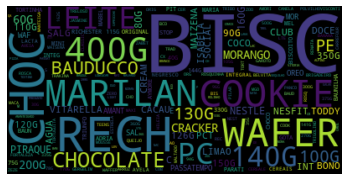

In [65]:
# Start with one review:
text = df_c.iloc[0,-1]

# Create and generate a word cloud image:
wc = WordCloud(collocations=False).generate(df_c.loc['BISCOITO','nm_item'])


fig, ax = plt.subplots()
ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
#st.pyplot(fig)

In [76]:
from neonlp import NeoNLP
NLP = NeoNLP()
nuvem = df_c.loc[process.extractOne('biscoito',df_c.index)[0],'nm_item']
NLP.build_model([nuvem])


In [87]:
NLP.text2vec.transform([nuvem]).toarray()[0][403]
#NLP.index2token(1)
#NLP.token2index('bisc')

5794

<AxesSubplot:xlabel='token'>

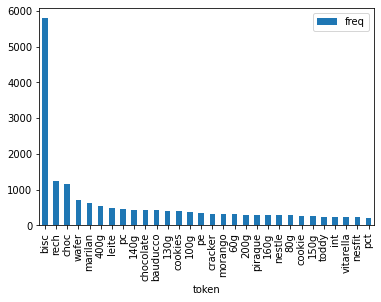

In [132]:
from neonlp import NeoNLP
NLP = NeoNLP()
nuvem = df_c.loc[process.extractOne('biscoito',df_c.index)[0],'nm_item']
NLP.build_model([nuvem])
df = pd.DataFrame.from_dict(NLP.vocabulary(),orient='index').reset_index()
df.columns=['token','key']
df = df.sort_values('key').reset_index(drop=True).set_index('key')
df.loc[:,'freq'] = NLP.text2vec.transform([nuvem]).toarray().T
df = df.sort_values(by='freq',ascending=False).iloc[:30,:]
df.plot(kind='bar',x='token')

In [147]:
df = pd.DataFrame(NLP.text2vec.transform([nuvem]).toarray().T, index = NLP.text2vec.get_feature_names(), columns = ['freq'])
df = df.sort_values('freq',ascending=False).iloc[:20,:]
df.index.name = 'token'
df

df

d:\Nuvem\ghdaru\OneDrive\010_PROJETOS\1340_PROJ_CAT_ANALYTICS\streamlit\streamlit\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,freq
token,
bisc,5794
rech,1229
choc,1169
wafer,699
marilan,618
400g,546
leite,477
pc,452
140g,430


In [149]:
import seaborn as sns
sns.barplot(x="freq", y="token", data=df,
            label="Frequencia", color="b", ax=axs[1])

NameError: name 'axs' is not defined

d:\Nuvem\ghdaru\OneDrive\010_PROJETOS\1340_PROJ_CAT_ANALYTICS\streamlit\streamlit\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:xlabel='freq', ylabel='token'>

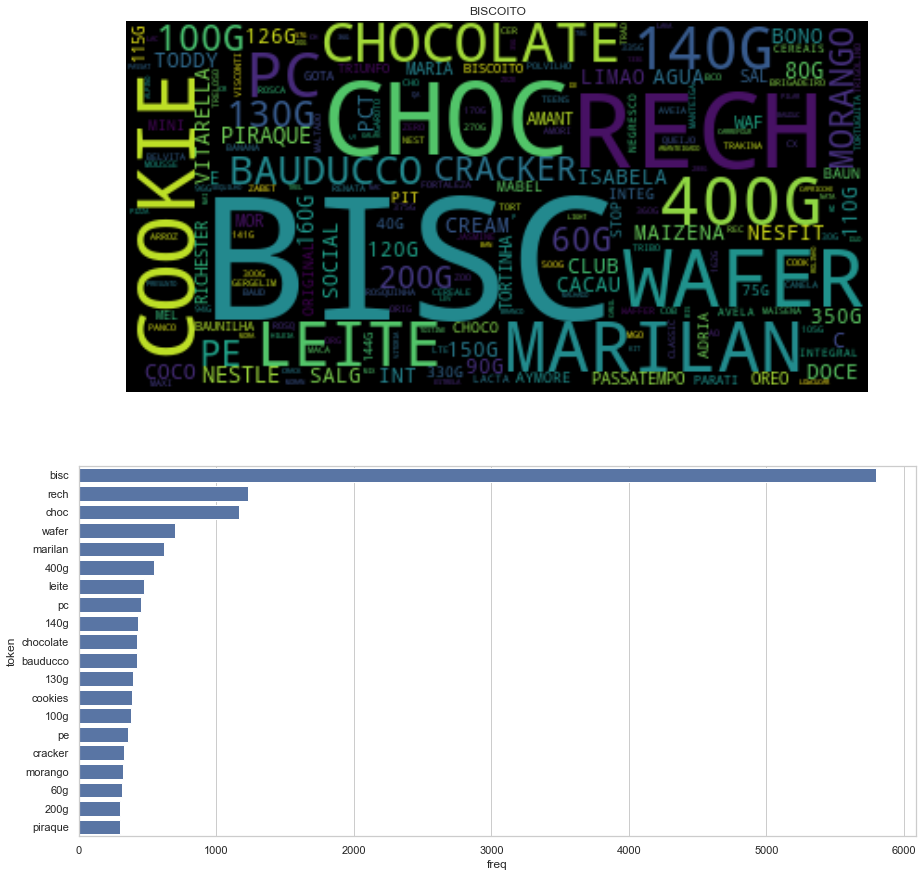

In [152]:
from thefuzz import process
import matplotlib.pyplot as plt
from neonlp import NeoNLP
import seaborn as sns
import matplotlib.pyplot as plt

df_item = pd.read_pickle('database.pkl')

NLP = NeoNLP()

df_category = df_item[['id_item','nm_product','nm_item']].groupby('nm_product').agg({'id_item':'count','nm_item':' '.join})

categoria = 'biscoito'

category_selected = process.extractOne(categoria,df_category.index)[0]

nuvem = df_category.loc[category_selected,'nm_item']

NLP.build_model([nuvem])

df = pd.DataFrame(NLP.text2vec.transform([nuvem]).toarray().T, index = NLP.text2vec.get_feature_names(), columns = ['freq'])
df = df.sort_values('freq',ascending=False).iloc[:20,:]
df.index.name = 'token'
# Create and generate a word cloud image:
wc = WordCloud(collocations=False).generate(nuvem)

fig, axs = plt.subplots(2,1,figsize=(15,15))
axs.flatten()
axs[0].set_title(category_selected)
axs[0].imshow(wc,interpolation='bilinear') 
axs[0].axis('off')
sns.set_theme(style="whitegrid")

sns.barplot(x="freq", y='token',data=df.reset_index(),
            label="Frequencia", color="b", ax=axs[1])



In [153]:
class Numbers():
    def __init__(self):
        self.color = "#8ef"
        self.number_pattern_raw = '([-+]?[0-9]*[\.,]?[0-9]+)'
        self.number_pattern_change = f" (\g<0>,'NUMBER',{self.color}) "
        self.number_pattern_extract = f"\((.*?),'NUMBER',{self.color}\)"               
    
    def parse_numbers(self, desc):
        """
        Change all numbers integer or float to sugested pattern
        default: NBR number and \g<0> value founded
        Args:
            desc (str): string to parse numbers
            repl (str, optional): Standard string. Defaults to ' <NBR:\g<0>> '.
        """        
        desc = re.sub(self.number_pattern_raw, self.number_pattern_change, desc)      
        #Extract extra spaces
        desc = re.sub('\s{2,}',' ',desc)  
        return desc
    
    
    def extract_numbers(self, desc, processed = False):
        if not processed:
            desc = self.parse_numbers(desc)
        return re.findall(self.number_pattern_extract, desc)
    
class Description(Numbers):
    def __init__(self, description):
        Numbers.__init__(self)
        self.description = description
        self.description_normalized = self.normalize(self.description)
        self.description_processed = self.parse_numbers(self.description_normalized)
        self.annoted_description = self.desc2annotated(self.description_processed)
        self.objets = {'NUMBERS': self.extract_numbers(self.description_processed, True)}
    
    def normalize(self, text):
        """
        Transforma texto para minúsculo e sem acento
        Entrada:
        texto
        Retorno:
        Texto no formato minúsculo e sem acento.
        """
        return unidecode.unidecode(text.lower())   
    
    
    def __str__(self):
        return f'{self.description_processed},{self.description_normalized},{self.description_processed},{self.objets}'
    
    def to_annotated(self):
        pass

In [157]:
import re
x = Numbers()
d = 'ACHOC NESCAU 2.0 LT 350g'
x.parse_numbers(d).split()

['ACHOC', 'NESCAU', "(2.0,'NUMBER',#8ef)", 'LT', "(350,'NUMBER',#8ef)", 'g']